<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-на-разных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов на разных этапах очистки</a></span></li><li><span><a href="#Размеры-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Размеры-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-разных-моделей-и-проверка-кросс-валидацией" data-toc-modified-id="Обучение-разных-моделей-и-проверка-кросс-валидацией-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и проверка кросс-валидацией</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [2]:
pd.options.mode.chained_assignment = None

### Изучение данных

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
data_train.head(20)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
data_test.head(20)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
data_full.head(20)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


На первый взгляд можно заметить, что в тестовых данных меньше колонок, чем в двух других. Причины этого мы попробуем выяснить дальше.

### Проверка расчета эффективности обогащения

In [10]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [11]:
def recovery(row):
    return 100 * (row['rougher.output.concentrate_au'] * \
                  (row['rougher.input.feed_au'] - \
                   row['rougher.output.tail_au']))/(row['rougher.input.feed_au'] * \
                             (row['rougher.output.concentrate_au'] - \
                              row['rougher.output.tail_au']))

In [12]:
data_train['rougher.output.recovery_new'] = data_train.apply(recovery, axis=1)

In [13]:
data_train['rougher.output.recovery_new']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery_new, Length: 14149, dtype: float64

In [14]:
mean_absolute_error(data_train['rougher.output.recovery_new'], data_train['rougher.output.recovery'])

1.1131451184435918e-14

MAE очень маленькая - можно считать, что в обучающей выборке rougher.output.recovery посчитана правильно.

In [15]:
data_train = data_train.drop('rougher.output.recovery_new', axis=1)



### Анализ признаков, недоступных в тестовой выборке

In [16]:
difference = []
for col in data_train.columns:
    if col not in data_test.columns:
        difference.append(col)
difference

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все пропущенные в тестовой выборке колонки относятся к классу output. Можно предположить, что эти признаки можно получить только после окончания процесса, следовательно, для обучения модели их нельзя будет использовать.

### Предобработка данных

In [17]:
data_train.duplicated().sum()

0

In [18]:
data_test.duplicated().sum()

0

In [19]:
data_full.duplicated().sum()

0

Полных дубликатов нет.

In [20]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [21]:
for col in data_train.columns[1:]:
    data_train[col] = data_train[col].fillna(method='ffill')

In [22]:
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [23]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [24]:
for col in data_test.columns[1:]:
    data_test[col] = data_test[col].fillna(method='ffill')

In [25]:
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [26]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [27]:
for col in data_full.columns[1:]:
    data_full[col] = data_full[col].fillna(method='ffill')

In [28]:
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Пропуски в данных были заполнены предыдущими значениями, поскольку в условии написано, что соседние по времени параметры часто похожи.

Теперь эти данные можно анализировать и строить на них модели.

## Анализ данных

### Изменение концентрации металлов на разных этапах очистки

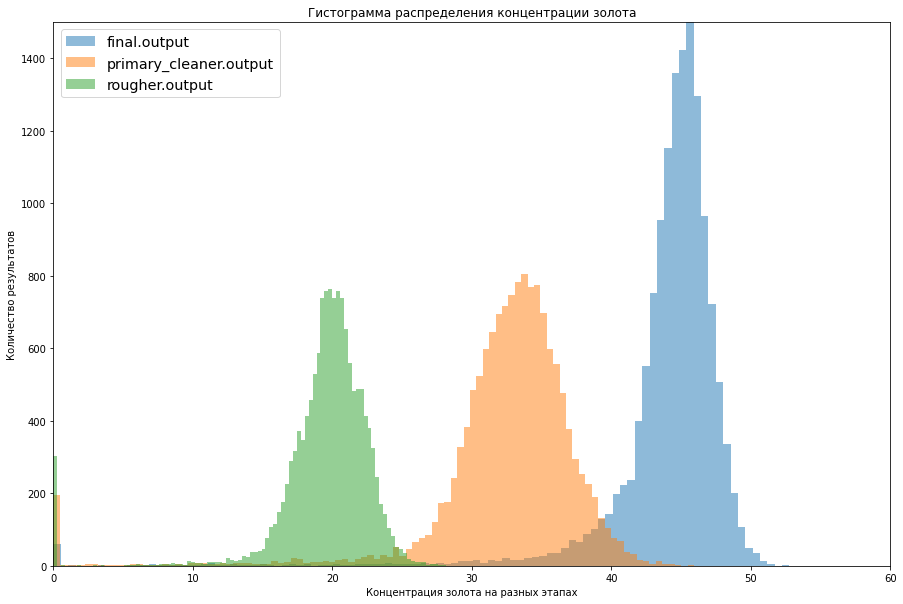

In [29]:
plt.figure(figsize=[15, 10])
plt.hist(data_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 60])
plt.ylim([0, 1500])

plt.xlabel("Концентрация золота на разных этапах")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Гистограмма распределения концентрации золота")
plt.show()

Концентрация золота повышается с каждым этапом. Что логично, ведь смысл процесса - в том, что золото очищается от различных примесей.
Можно заметить возможную аномалия - пики около 0.

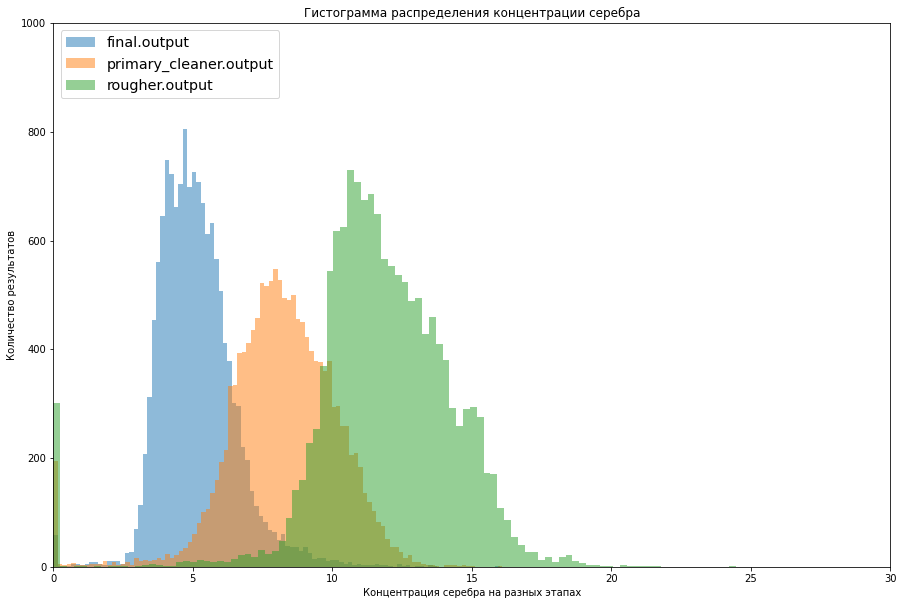

In [30]:
plt.figure(figsize=[15, 10])
plt.hist(data_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 30])
plt.ylim([0, 1000])

plt.xlabel("Концентрация серебра на разных этапах")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Концентрация серебра, напротив, понижается с каждым этапом. Опять-таки логично - сереюро отфильтровывается на каждом этапе.
Опять наблюдаются пики около 0.

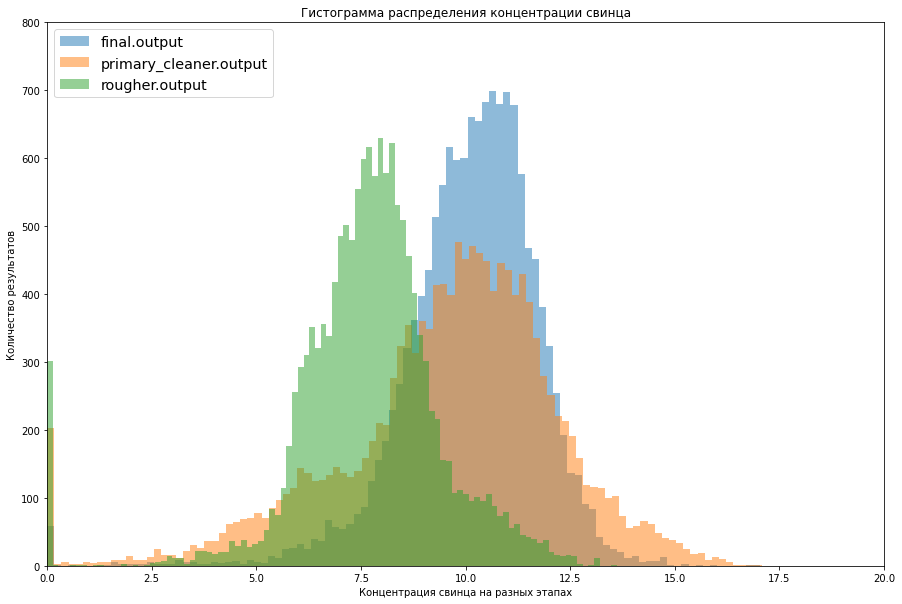

In [31]:
plt.figure(figsize=[15, 10])
plt.hist(data_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 800])

plt.xlabel("Концентрация свинца на разных этапах")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Концентрация свинца повышается на этапе первичной обработки и потом остается на примерно том же уровне. Это может быть связано и с тем, что другие примеси удаляются в большей степени, и с какими-либо технологическими особенностями. 

### Размеры гранул на обучающей и тестовой выборках

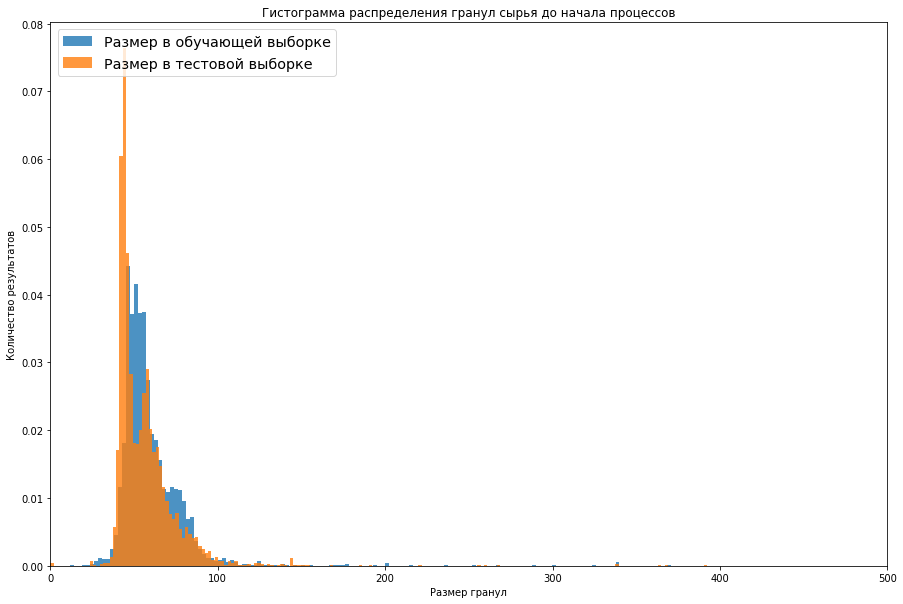

In [32]:
plt.figure(figsize=[15, 10])
plt.hist(data_train['rougher.input.feed_size'], bins=200, label = 'Размер в обучающей выборке', alpha=.8, density=True)
plt.hist(data_test['rougher.input.feed_size'], bins=200, label = 'Размер в тестовой выборке', alpha=.8, density=True)

plt.xlim([0, 500])

plt.xlabel("Размер гранул")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Гистограмма распределения гранул сырья до начала процессов")
plt.show()

Размеры гранул распределены нормально со смещением влево (возможно, распределение похаже на Пуассона).

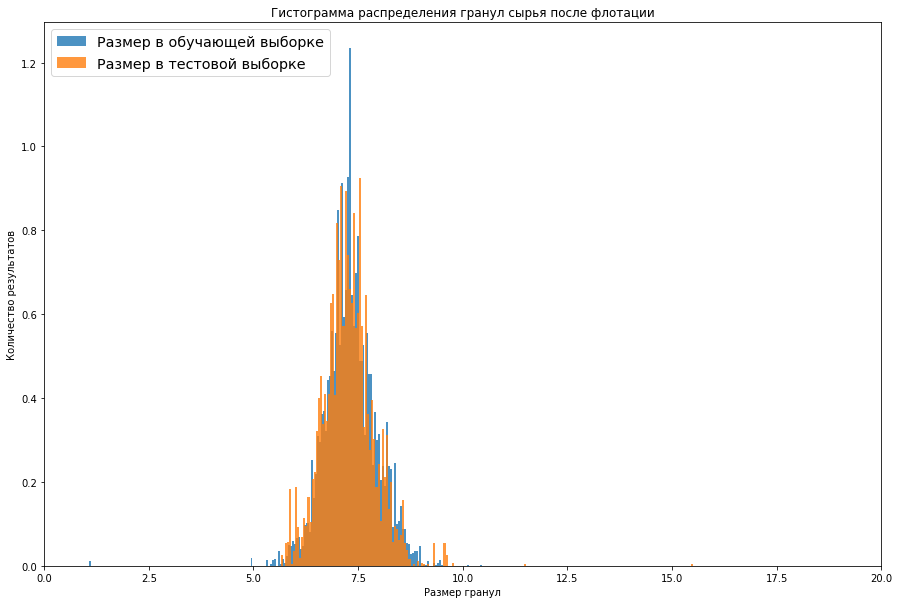

In [33]:
plt.figure(figsize=[15, 10])
plt.hist(data_train['primary_cleaner.input.feed_size'], bins=200, label = 'Размер в обучающей выборке', alpha=.8, density=True)
plt.hist(data_test['primary_cleaner.input.feed_size'], bins=200, label = 'Размер в тестовой выборке', alpha=.8, density=True)

plt.xlim([0, 20])

plt.xlabel("Размер гранул")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Гистограмма распределения гранул сырья после флотации")
plt.show()

После флотации размеры гранул на обеих выборках уже распределены нормально.

### Суммарная концентрация всех веществ на разных стадиях

Сначала соберем столбцы с суммарной концентрацией.

In [34]:
fin_conc_sum = (data_train['final.output.concentrate_au'] + 
                                      data_train['final.output.concentrate_ag'] + 
                                      data_train['final.output.concentrate_pb'] +
                                      data_train['final.output.concentrate_sol'])
prim_conc_sum = (data_train['primary_cleaner.output.concentrate_au'] + 
                                                data_train['primary_cleaner.output.concentrate_ag'] + 
                                                data_train['primary_cleaner.output.concentrate_pb'] +
                                                data_train['primary_cleaner.output.concentrate_sol'])
rough_conc_sum = (data_train['rougher.output.concentrate_au'] + 
                                        data_train['rougher.output.concentrate_ag'] + 
                                        data_train['rougher.output.concentrate_pb'] +
                                        data_train['rougher.output.concentrate_sol'])

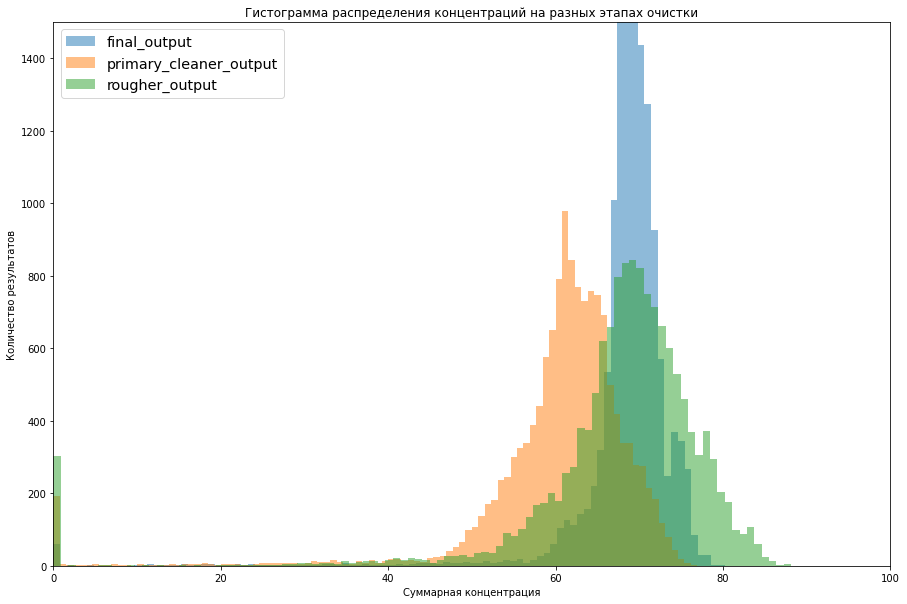

In [35]:
plt.figure(figsize=[15,10])

plt.hist(fin_conc_sum, bins=100, label = 'final_output', alpha=.5)
plt.hist(prim_conc_sum, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rough_conc_sum, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентрация")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Те аномалии, которые мы наблюдали в части 2.1, можно заметить и здесь в качестве пиков около 0. Это очевидно неправдоподобная ситуация, и строчки, в которых суммарная концентрация равна 0, нужно удалить, чтобы они не мешали при обучении модели.

In [36]:
def sum_conc(row):
    return row['final.output.concentrate_au'] + \
                                      row['final.output.concentrate_ag'] + \
                                      row['final.output.concentrate_pb'] + \
                                      row['final.output.concentrate_sol']

In [37]:
data_train['sum_conc'] = data_train.apply(sum_conc, axis=1)

In [38]:
data_train = data_train.drop(data_train[data_train['sum_conc']==0].index)

In [39]:
data_train[data_train['sum_conc']==0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_conc


In [40]:
data_train = data_train.drop('sum_conc', axis=1)

Анализ данных проведен, аномалии удалены - можно строить модели :)

## Модель

### Функция для вычисления sMAPE

In [41]:
def smape_rough(rough_rec_real, rough_rec_predicted):
    n = rough_rec_real.shape[0]
    rougher_smape = ((2*abs(rough_rec_real - rough_rec_predicted)/
                     (abs(rough_rec_real) + abs(rough_rec_predicted))).sum() * 100 / n)
    return rougher_smape

In [42]:
def smape_fin(fin_rec_real, fin_rec_predicted):
    n = fin_rec_real.shape[0]
    final_smape = ((2*abs(fin_rec_real - fin_rec_predicted)/
                     (abs(fin_rec_real) + abs(fin_rec_predicted))).sum() * 100 / n)
    return final_smape

### Обучение разных моделей и проверка кросс-валидацией

In [43]:
features_columns = data_test.columns
rougher_features_columns = set(features_columns[12:34])
rougher_features_columns.add(features_columns[0])
final_features_columns = set(features_columns)

In [44]:
final_features_train = data_train.drop(difference, axis=1)
diff_rough = set(final_features_train.columns) - rougher_features_columns
rougher_features_train = final_features_train.drop(diff_rough, axis=1)
final_target_train = data_train['final.output.recovery']
rougher_target_train = data_train['rougher.output.recovery']
final_features_test = data_test
diff = set(final_features_test.columns) - rougher_features_columns
rougher_features_test = final_features_test.drop(diff, axis=1)

In [45]:
data_train = data_train.set_index('date')
data_test = data_test.set_index('date')
data_full = data_full.set_index('date')
final_features_train = final_features_train.set_index('date')
rougher_features_train = rougher_features_train.set_index('date')
final_features_test = final_features_test.set_index('date')
rougher_features_test = rougher_features_test.set_index('date')

In [270]:
rough_smape_scorer = make_scorer(smape_rough, greater_is_better=False)

In [271]:
fin_smape_scorer = make_scorer(smape_fin, greater_is_better=False)

In [49]:
model_reg = LinearRegression()
parameters_linreg = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs': range(-1, 10, 2) , 
             }
grid = GridSearchCV(model_reg, param_grid=parameters_linreg, cv=5, scoring=rough_smape_scorer)
grid.fit(rougher_features_train, rougher_target_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}

In [50]:
grid = GridSearchCV(model_reg, param_grid=parameters_linreg, cv=5, scoring=fin_smape_scorer)
grid.fit(final_features_train, final_target_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}

In [51]:
parameters_forest = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
             }

In [52]:
model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, param_grid=parameters_forest, cv=5, scoring=rough_smape_scorer)
grid.fit(rougher_features_train, rougher_target_train)
grid.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [53]:
model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, param_grid=parameters_forest, cv=5, scoring=fin_smape_scorer)
grid.fit(final_features_train, final_target_train)
grid.best_params_

{'max_depth': 5, 'n_estimators': 40}

In [272]:
model = LinearRegression()
model.fit(rougher_features_train, rougher_target_train)
rough_rec_predicted = model.predict(rougher_features_test)
model.fit(final_features_train, final_target_train)
fin_rec_predicted = model.predict(final_features_test)
rough_rec_real = data_full.loc[rougher_features_test.index,'rougher.output.recovery']
fin_rec_real = data_full.loc[final_features_test.index,'final.output.recovery']
print('sMAPE для оптимальной для rougher регрессии:', smape_rough(rough_rec_real, rough_rec_predicted)*0.25 + smape_fin(fin_rec_real, fin_rec_predicted)*0.75)

sMAPE для оптимальной для rougher регрессии: 9.76312143794528


In [273]:
model = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1)
model.fit(rougher_features_train, rougher_target_train)
rough_rec_predicted = model.predict(rougher_features_test)
model.fit(final_features_train, final_target_train)
fin_rec_predicted = model.predict(final_features_test)
rough_rec_real = data_full.loc[rougher_features_test.index,'rougher.output.recovery']
fin_rec_real = data_full.loc[final_features_test.index,'final.output.recovery']
print('sMAPE для оптимальной для final регрессии:', smape_rough(rough_rec_real, rough_rec_predicted)*0.25 + smape_fin(fin_rec_real, fin_rec_predicted)*0.75)

sMAPE для оптимальной для final регрессии: 9.64737594732453


In [274]:
model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=3)
model.fit(rougher_features_train, rougher_target_train)
rough_rec_predicted = model.predict(rougher_features_test)
model.fit(final_features_train, final_target_train)
fin_rec_predicted = model.predict(final_features_test)
rough_rec_real = data_full.loc[rougher_features_test.index,'rougher.output.recovery']
fin_rec_real = data_full.loc[final_features_test.index,'final.output.recovery']
print('sMAPE для случайного леса:', smape_rough(rough_rec_real, rough_rec_predicted)*0.25 + smape_fin(fin_rec_real, fin_rec_predicted)*0.75)

sMAPE для случайного леса: 9.633123493048682


In [275]:
model = RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=5)
model.fit(rougher_features_train, rougher_target_train)
rough_rec_predicted = model.predict(rougher_features_test)
model.fit(final_features_train, final_target_train)
fin_rec_predicted = model.predict(final_features_test)
rough_rec_real = data_full.loc[rougher_features_test.index,'rougher.output.recovery']
fin_rec_real = data_full.loc[final_features_test.index,'final.output.recovery']
print('sMAPE для случайного леса:', smape_rough(rough_rec_real, rough_rec_predicted)*0.25 + smape_fin(fin_rec_real, fin_rec_predicted)*0.75)

sMAPE для случайного леса: 9.634502323505977


In [276]:
median_rougher_recovery = data_train['rougher.output.recovery'].median()
median_final_recovery = data_train['final.output.recovery'].median()

n = rough_rec_real.shape[0]
rougher_smape = ((2*abs(rough_rec_real - median_rougher_recovery)/
                     (abs(rough_rec_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_smape = ((2*abs(fin_rec_real - median_final_recovery)/
                     (abs(fin_rec_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_smape * 0.25 + final_smape * 0.75)

sMAPE для медианной константной модели 9.468366202426632


### Выводы

В итоге получается, что случайный лес ошибается чуть меньше, чем линейная регрессия - можно считать его лучшей моделью для данной задачи (хотя их показатели sMAPE в принципе достаточно схожи, чтобы считать их равносильными). При этом видно, что на самом деле константная медианная модель предсказывает даже чуть лучше: лучшие показатели - 9.64 для регрессии, 9.63 для случайного леса и 9.47 для константной модели.